TASK 01

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


given_file = "/content/IMDB Dataset.csv"
df = pd.read_csv(given_file)

print(df.head())


df['label'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(df['review'])
y = df['label']


print("Bag-of-Words Matrix Shape:", X.shape)


Bag-of-Words Matrix Shape: (50000, 101895)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (40000, 101895)
Testing Data Shape: (10000, 101895)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
print(f"Logistic Regression Accuracy: {log_reg_acc:.4f}")

# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print(f"Naive Bayes Accuracy: {nb_acc:.4f}")


Logistic Regression Accuracy: 0.8874
Naive Bayes Accuracy: 0.8487


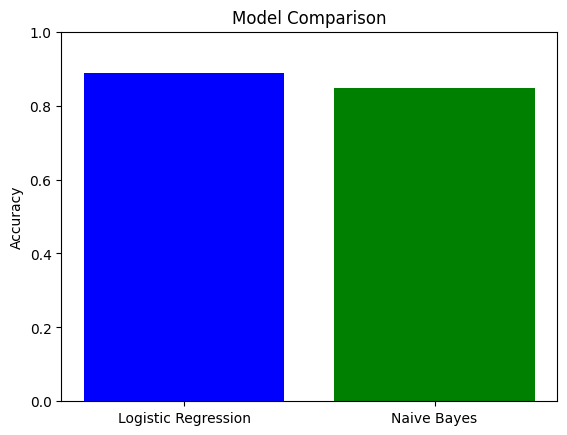

In [ ]:
import matplotlib.pyplot as plt

model_names = ['Logistic Regression', 'Naive Bayes']
accuracies = [log_reg_acc, nb_acc]

plt.bar(model_names, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1)
plt.show()

The bar chart here suggests that Logistic Regression performs better than Naive Bayes. The reason here could be the ability of Logistic Regression to handle linearly separable data more effectively.

TASK **02**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

X_tfidf = tfidf_vectorizer.fit_transform(df['review'])

print("TF-IDF Matrix Shape:", X_tfidf.shape)


TF-IDF Matrix Shape: (50000, 101895)


In [ ]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

print("Training Data Shape (TF-IDF):", X_train_tfidf.shape)
print("Testing Data Shape (TF-IDF):", X_test_tfidf.shape)


Training Data Shape (TF-IDF): (40000, 101895)
Testing Data Shape (TF-IDF): (10000, 101895)


In [ ]:
# Logistic Regression
log_reg_tfidf = LogisticRegression(max_iter=1000)
log_reg_tfidf.fit(X_train_tfidf, y_train)
log_reg_tfidf_pred = log_reg_tfidf.predict(X_test_tfidf)
log_reg_tfidf_acc = accuracy_score(y_test, log_reg_tfidf_pred)
print(f"Logistic Regression Accuracy (TF-IDF): {log_reg_tfidf_acc:.4f}")

# Naive Bayes
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
nb_tfidf_pred = nb_tfidf.predict(X_test_tfidf)
nb_tfidf_acc = accuracy_score(y_test, nb_tfidf_pred)
print(f"Naive Bayes Accuracy (TF-IDF): {nb_tfidf_acc:.4f}")


Logistic Regression Accuracy (TF-IDF): 0.8997
Naive Bayes Accuracy (TF-IDF): 0.8638


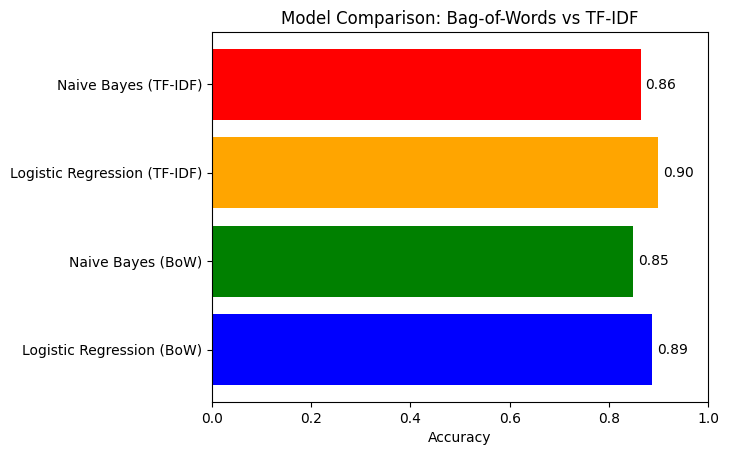

In [ ]:
model_names = ['Logistic Regression (BoW)', 'Naive Bayes (BoW)',
               'Logistic Regression (TF-IDF)', 'Naive Bayes (TF-IDF)']
accuracies = [log_reg_acc, nb_acc, log_reg_tfidf_acc, nb_tfidf_acc]

plt.barh(model_names, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Accuracy')
plt.title('Model Comparison: Bag-of-Words vs TF-IDF')
plt.xlim(0, 1)


for i, acc in enumerate(accuracies):
    plt.text(acc + 0.01, i, f"{acc:.2f}", va='center')

plt.show()


Here it shows that the best performance (0.90) was in Logistic regression (TF-IDF) and Naive Bayes (TF-IDF) second 0.86. Logistic Regression also gets better training with Bag of Words (BoW) at 0.89, while Naive Bayes (BoW) has the lowest accuracy (0.85). TF-IDF outperforms BoW as it emphasizes the importance of terms by reducing the impact of common words, leading to better feature representation. Logistic Regression is consistently better than Naive Bayes because it can learn complex decision boundaries thus making Logistic Regression with TF-IDF the best-performing model overall.

Task 3

In [ ]:
pip install tensorflow keras

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

file_path = "/content/IMDB Dataset.csv"
df = pd.read_csv(file_path)

df['label'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['review'])

sequences = tokenizer.texts_to_sequences(df['review'])

maxlen = 100
X = pad_sequences(sequences, maxlen=maxlen)
y = df['label'].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
glove_path = "/content/glove.6B.100d.txt"
embedding_dim = 100

embeddings_index = {}
with open(glove_path, "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs


embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

print(f"Embedding matrix shape: {embedding_matrix.shape}")

Embedding matrix shape: (10000, 100)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen,
              weights=[embedding_matrix], trainable=False),

    LSTM(10, activation='tanh'),

    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

None


In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 58s 43ms/step - accuracy: 0.6802 - loss: 0.5753 - val_accuracy: 0.7974 - val_loss: 0.4365
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 68s 32ms/step - accuracy: 0.8121 - loss: 0.4132 - val_accuracy: 0.8163 - val_loss: 0.4051
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.8243 - loss: 0.3840 - val_accuracy: 0.8280 - val_loss: 0.3780
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.8349 - loss: 0.3664 - val_accuracy: 0.8333 - val_loss: 0.3656
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.8420 - loss: 0.3522 - val_accuracy: 0.8411 - val_loss: 0.3589
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.8514 - loss: 0.3388 - val_accuracy: 0.8454 - val_loss: 0.3484
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 33ms/step - accuracy: 0.8565 - loss: 0.3228 - val_accuracy: 0.8446 - val_loss: 0.3465
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.8560 -

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8475 - loss: 0.3750
Test Accuracy: 0.8500


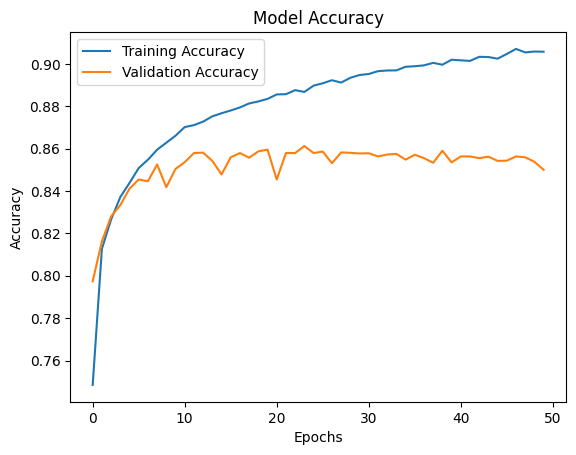

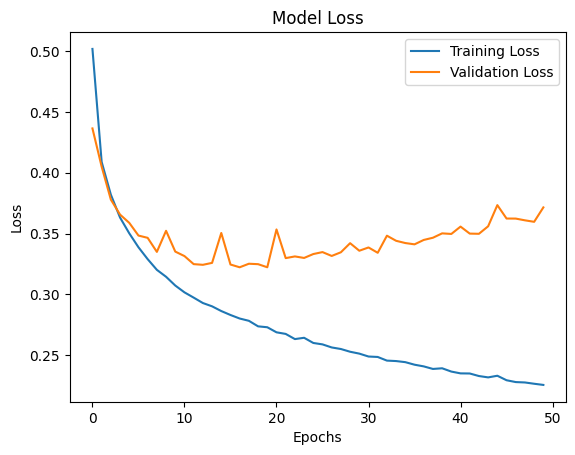

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The performance difference of the traditional machine learning models is wide apart from that of the LSTM neural network. Among the first analyses, Logistic Regression with TF-IDF topped at 0.90 accuracy, with Logistic Regression using BoW coming a close second at 0.89. Then comes Naive Bayes, which also shows a good performance of 0.86 (TF-IDF) and 0.85 (BoW). On the contrary, the LSTM model has been trained on 50 epochs with high training accuracy, but the validation accuracy stops increasing early, with signs of overfitting. The same is suggested by the validation loss curve, which is not improving in contrast to a training loss that is still decreasing.